# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)

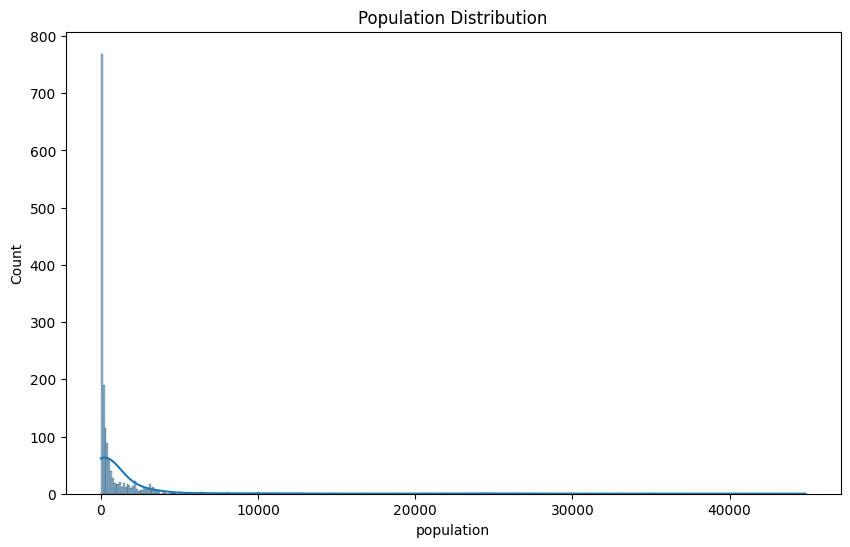

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['population'], kde=True)
plt.title('Population Distribution')
plt.show()

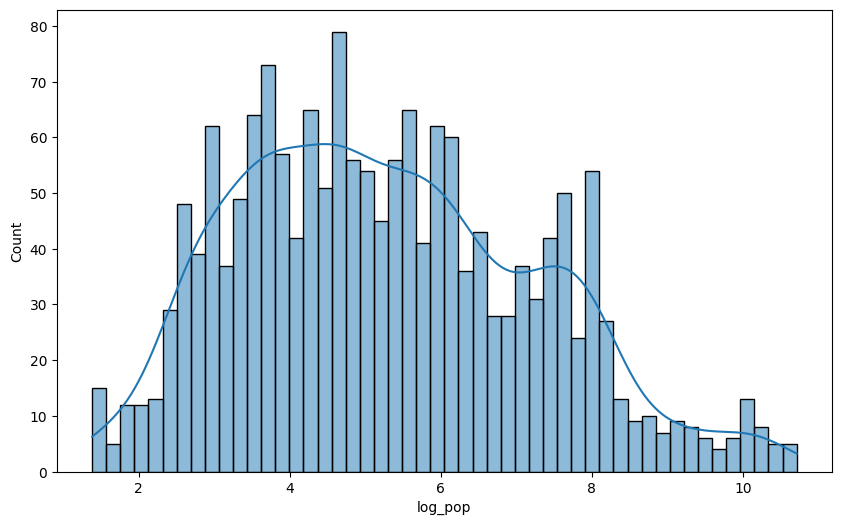

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['log_pop'], kde=True, bins=50);

## 推移

/tmp/ipykernel_62307/2383172923.py:2: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])


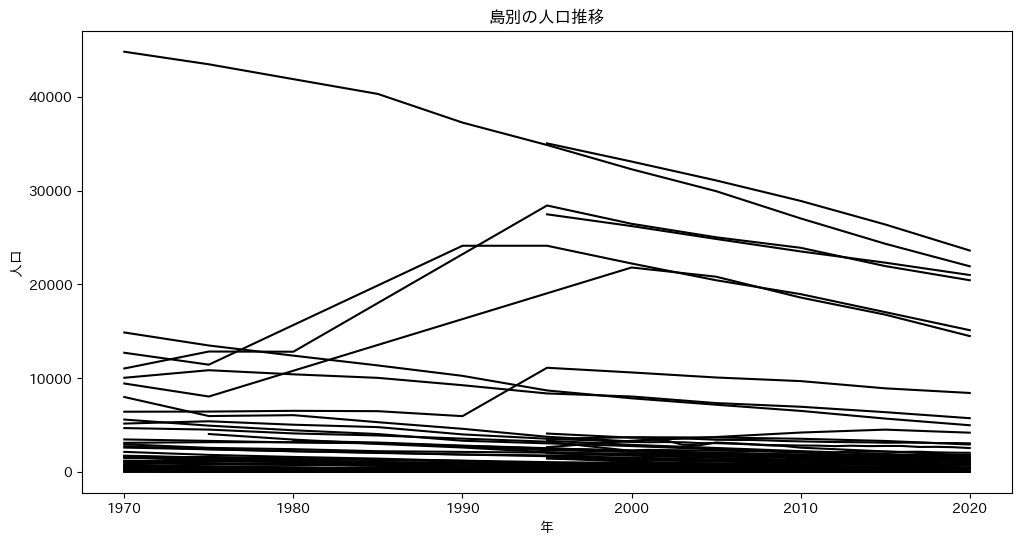

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])
plt.title('島別の人口推移')
plt.ylabel('人口')
plt.xlabel('年')
plt.legend().remove()
plt.show()